In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

### From folder audio to list file name

In [2]:
import glob

# Specify the path with double asterisks for recursive search
path = 'D:/trap/Research/AI Bin/Audio from scratch/bottle_sound_clean_pro/HDPE/*.wav'
#bottle_sound_clean_pro\HDPE\3hdpe1_0.wav
#D:\trap\Research\AI Bin\Audio from scratch\bottle_sound_clean_pro\HDPE\3hdpe1_0.wav


# Use glob to find all .wav files
audio_files = glob.glob(path, recursive=True)

# Print the list of found audio files
print(audio_files)


['D:/trap/Research/AI Bin/Audio from scratch/bottle_sound_clean_pro/HDPE\\3hdpe1000_0.wav', 'D:/trap/Research/AI Bin/Audio from scratch/bottle_sound_clean_pro/HDPE\\3hdpe1001_0.wav', 'D:/trap/Research/AI Bin/Audio from scratch/bottle_sound_clean_pro/HDPE\\3hdpe1002_0.wav', 'D:/trap/Research/AI Bin/Audio from scratch/bottle_sound_clean_pro/HDPE\\3hdpe1003_0.wav', 'D:/trap/Research/AI Bin/Audio from scratch/bottle_sound_clean_pro/HDPE\\3hdpe1004_0.wav', 'D:/trap/Research/AI Bin/Audio from scratch/bottle_sound_clean_pro/HDPE\\3hdpe1005_0.wav', 'D:/trap/Research/AI Bin/Audio from scratch/bottle_sound_clean_pro/HDPE\\3hdpe1006_0.wav', 'D:/trap/Research/AI Bin/Audio from scratch/bottle_sound_clean_pro/HDPE\\3hdpe1007_0.wav', 'D:/trap/Research/AI Bin/Audio from scratch/bottle_sound_clean_pro/HDPE\\3hdpe1008_0.wav', 'D:/trap/Research/AI Bin/Audio from scratch/bottle_sound_clean_pro/HDPE\\3hdpe1009_0.wav', 'D:/trap/Research/AI Bin/Audio from scratch/bottle_sound_clean_pro/HDPE\\3hdpe100_0.wav',

In [3]:
import os

# Verify the directory path
directory = 'D:/trap/Research/AI Bin/Audio from scratch/bottle_sound_clean_pro'
print(os.listdir(directory))


['GLASS', 'HDPE', 'METAL', 'PET']


In [4]:
# Play audio file
ipd.Audio(audio_files[100])

In [5]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [-0.03556849  0.23874867  0.48531312  0.44132626  0.31348574  0.2578139
  0.13509147 -0.16161391 -0.53268963 -0.71231574]
shape y: (22050,)
sr: 22050


### Represent audio in Time Domain

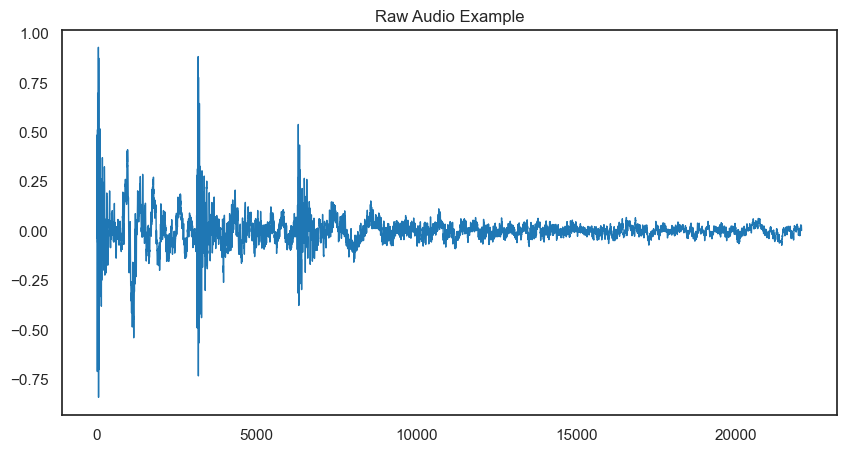

In [6]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

In [7]:
print("y (sample sound)", y)
print(y.shape)

y (sample sound) [-0.03556849  0.23874867  0.48531312 ...  0.00352049  0.00288278
  0.00177189]
(22050,)


### Spectrogram

C:\Users\Dell 5505\AppData\Local\Temp\ipykernel_23028\2498947804.py:2: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(sgram)


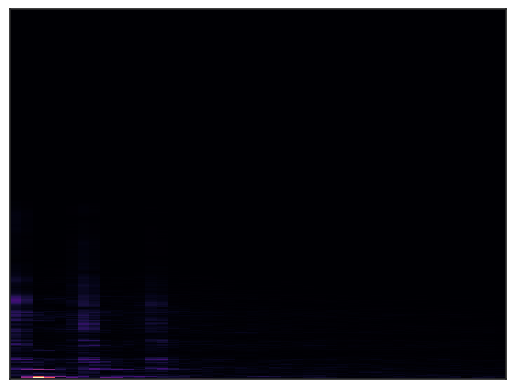

In [8]:
sgram = librosa.stft(y)
librosa.display.specshow(sgram)
plt.show()

### Mel spectrogram orgin

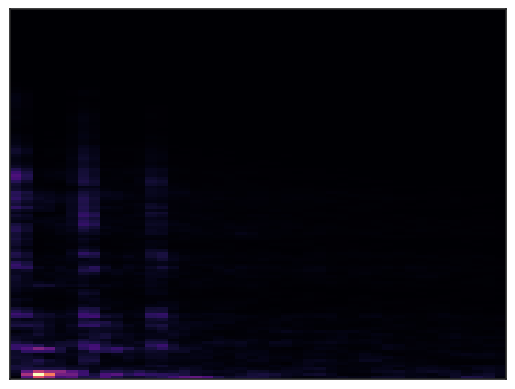

In [9]:
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr= sr)
librosa.display.specshow(mel_scale_sgram)

In [12]:
print(mel_scale_sgram.shape)
print(mel_scale_sgram)

(128, 44)
[[9.48420838e-02 1.83317065e+00 4.05797243e+00 ... 8.03917110e-01
  6.25338435e-01 1.95361406e-01]
 [2.93810546e-01 3.14145398e+00 6.72275114e+00 ... 4.10636246e-01
  5.21577895e-01 2.71641582e-01]
 [4.95664835e-01 1.93503642e+00 3.57862401e+00 ... 2.13521957e-01
  3.53473306e-01 2.73777574e-01]
 ...
 [5.25447633e-03 2.62063555e-03 1.06316804e-07 ... 1.73124306e-08
  1.57431878e-05 3.51172057e-05]
 [5.18874079e-03 2.58807000e-03 6.17822664e-08 ... 8.68651640e-09
  1.54841982e-05 3.45373846e-05]
 [5.14692860e-03 2.56734947e-03 4.54477629e-08 ... 6.17326235e-09
  1.53225646e-05 3.41752784e-05]]


### Mel Spectrogram after decibel scale 

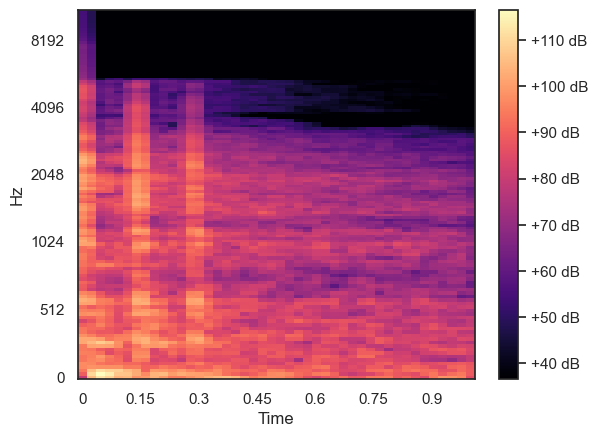

In [10]:
# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr= sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

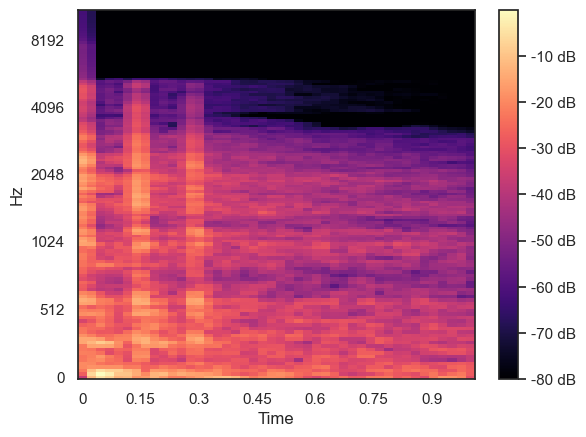

In [18]:
# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.max)
librosa.display.specshow(mel_sgram, sr= sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [11]:
print(mel_sgram)
print(mel_sgram.shape)

[[ 79.54002  105.26406  112.16618  ...  98.104225  95.9223    85.81677 ]
 [ 89.36135  109.94261  116.55094  ...  92.26914   94.34638   88.679924]
 [ 93.90376  105.73378  111.074326 ...  86.58885   90.96713   88.747955]
 ...
 [ 54.41059   48.368134  36.55094  ...  36.55094   36.55094   36.55094 ]
 [ 54.30124   48.25952   36.55094  ...  36.55094   36.55094   36.55094 ]
 [ 54.23096   48.1897    36.55094  ...  36.55094   36.55094   36.55094 ]]
(128, 44)



IMAGE PIXEL ARRAY:
 [[ 79.54002  105.26406  112.16618  ...  98.104225  95.9223    85.81677 ]
 [ 89.36135  109.94261  116.55094  ...  92.26914   94.34638   88.679924]
 [ 93.90376  105.73378  111.074326 ...  86.58885   90.96713   88.747955]
 ...
 [ 54.41059   48.368134  36.55094  ...  36.55094   36.55094   36.55094 ]
 [ 54.30124   48.25952   36.55094  ...  36.55094   36.55094   36.55094 ]
 [ 54.23096   48.1897    36.55094  ...  36.55094   36.55094   36.55094 ]]
85.81677


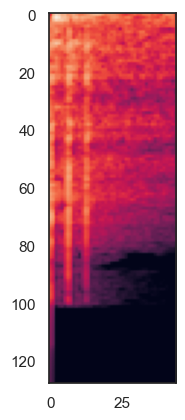

In [15]:
#show image
import numpy as np
import matplotlib.pyplot as plt

index = 0
# Set number of characters per row when printing
np.set_printoptions(linewidth=500)

# Print the label and image
print(f'\nIMAGE PIXEL ARRAY:\n {mel_sgram}')

print(mel_sgram[0,43])


# Visualize the image
plt.imshow(mel_sgram)


In [12]:
import numpy as np
mel_sgram_cnn = np.expand_dims(mel_sgram, axis=2)

In [13]:
print(mel_sgram_cnn.shape)

(128, 44, 1)


### Model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 42, 16)       160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 21, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 19, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 9, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 7, 64)         18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 3, 64)         0

In [16]:
model_cnn_audio.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

SyntaxError: invalid syntax (3968313532.py, line 1)